<a href="https://colab.research.google.com/github/feniltailor22/Machine_Learning/blob/main/Malarial_cell_classification_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import numpy as np
import cv2
import os
import keras
import pandas as pd

In [6]:
np.random.seed(1000)

In [7]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [8]:
image_directory = '/content/drive/MyDrive/Cell/'

In [10]:
train_path = '/content/drive/MyDrive/Cell/Train'
valid_path = '/content/drive/MyDrive/Cell/Test'

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, BatchNormalization, Dropout

In [12]:
model= Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape= (64,64,3), activation='relu'))  #Convolutional Layer
model.add(MaxPool2D(pool_size=(2,2))) #Pooling Layer
model.add(BatchNormalization(axis= -1)) #Normalization Layer
model.add(Dropout(rate=0.2)) #Random DropOut Layer

In [13]:
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))  #Convolutional Layer
model.add(MaxPool2D(pool_size=(2,2))) #Pooling Layer
model.add(BatchNormalization(axis= -1)) #Normalization Layer
model.add(Dropout(rate=0.2)) #Random DropOut Layer

In [14]:
model.add(Flatten())

In [15]:
model.add(Dense(units=512, activation='relu')) #Second Last Hidden Layer
model.add(BatchNormalization(axis= -1)) #Normalization Layer
model.add(Dropout(rate=0.2)) #Random DropOut Layer

In [16]:
model.add(Dense(units=256, activation='relu')) #Last Hidden Layer
model.add(BatchNormalization(axis= -1)) #Normalization Layer
model.add(Dropout(rate=0.2)) #Random DropOut Layer

In [17]:
model.add(Dense(units=2, activation='sigmoid')) #Output Layer

In [18]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 31, 31, 32)        128       
_________________________________________________________________
dropout (Dropout)            (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 14, 14, 32)        1

In [20]:
from keras.preprocessing.image import ImageDataGenerator

In [21]:
train_datagen= ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [22]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Cell/Train',
                                                 target_size = (64, 64),
                                                 batch_size = 3,
                                                 class_mode = 'categorical')

Found 1696 images belonging to 2 classes.


In [23]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Cell/Test',
                                            target_size = (64, 64),
                                            batch_size = 2,
                                            class_mode = 'categorical')

Found 64 images belonging to 2 classes.


In [33]:
model.fit_generator(training_set,          
          epochs=10,
          validation_data=test_set,
          verbose=True
          )

Epoch 1/10
  4/566 [..............................] - ETA: 10s - loss: 0.9062 - accuracy: 0.6667

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


566/566 [==============================] - 12s 21ms/step - loss: 0.5041 - accuracy: 0.7789 - val_loss: 0.5634 - val_accuracy: 0.7344
Epoch 2/10
566/566 [==============================] - 12s 21ms/step - loss: 0.4844 - accuracy: 0.7871 - val_loss: 0.9392 - val_accuracy: 0.7031
Epoch 3/10
566/566 [==============================] - 12s 21ms/step - loss: 0.4889 - accuracy: 0.7783 - val_loss: 1.9881 - val_accuracy: 0.5000
Epoch 4/10
566/566 [==============================] - 12s 21ms/step - loss: 0.4644 - accuracy: 0.8042 - val_loss: 1.1329 - val_accuracy: 0.5312
Epoch 5/10
566/566 [==============================] - 12s 21ms/step - loss: 0.4723 - accuracy: 0.8007 - val_loss: 1.6149 - val_accuracy: 0.5000
Epoch 6/10
566/566 [==============================] - 12s 21ms/step - loss: 0.4449 - accuracy: 0.8078 - val_loss: 0.3112 - val_accuracy: 0.9375
Epoch 7/10
566/566 [==============================] - 12s 21ms/step - loss: 0.4908 - accuracy: 0.7913 - val_loss: 0.3338 - val_accuracy: 0.9219
Epo

In [34]:
model.metrics_names

['loss', 'accuracy']

In [36]:
losses= pd.DataFrame(data=model.history.history)

In [37]:
losses.head()


,loss,accuracy,val_loss,val_accuracy
0,0.504098,0.778892,0.563352,0.734375
1,0.484351,0.787146,0.939211,0.703125
2,0.488877,0.778302,1.988133,0.500000
3,0.464382,0.804245,1.132913,0.531250
4,0.472265,0.800708,1.614945,0.500000


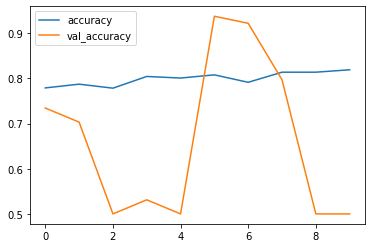

In [39]:
losses[['accuracy','val_accuracy']].plot()

In [48]:
losses.max()

loss            0.504098
accuracy        0.818986
val_loss        3.001272
val_accuracy    0.937500
dtype: float64

In [49]:
losses.min()

loss            0.414442
accuracy        0.778302
val_loss        0.311178
val_accuracy    0.500000
dtype: float64

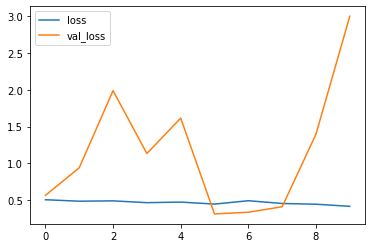

In [40]:
losses[['loss','val_loss']].plot()